# Test the implementation of cartpole.py

## Structure
1. Rollout of custom envs: IMANO, IMANS
2. Time series analysis of IMANO, IMANS
3. Excess autocorrelation in IMANO, IMANS: manual implementation
4. (Easier) Implementation of time series, plots, and excess autocorrelation in IMANO/IMANS with FUNCTIONS (prevents unnecessary errors). **Probably the most useful part from 1-4**.


Two environments:
1. IMANSCartpoleEnv: Independent Moving Average Noise States. This environment noises the state transition dynamics with a noise vector
2. IMANOCartpoleEnv: Independent Moving Average Noise Observations. This environment noises the observations with a noise vector.

# 1. Rollout of custom envs: IMANO, IMANS

#### Sources:
- https://medium.com/cloudcraftz/build-a-custom-environment-using-openai-gym-for-reinforcement-learning-56d7a5aa827b
- https://www.gymlibrary.dev/environments/classic_control/cart_pole/


## Start with regular cartpole

In [1]:
import gymnasium as gym

In [2]:
env_original = gym.make("CartPole-v1")

In [3]:
observation = env_original.reset()

# Run the episode until it is terminated
done = False

#while not done:
for i in range(5):
    # Sample an action (in this example, we are taking random actions)
    action = env_original.action_space.sample()

    # Perform the action and receive the new observation, reward, termination, and info
    new_observation, reward, done, info, _ = env_original.step(action)

    # Update the observation for the next step
    observation = new_observation

    print("run: ", i)
    print("action", action)
    print("action shape", action.size)
    print("new obs", new_observation)
    print("new obs", new_observation.shape)
    print("===")
          
env_original.close()

run:  0
action 0
action shape 1
new obs [ 0.0217262  -0.15827172  0.04735231  0.31141162]
new obs (4,)
===
run:  1
action 1
action shape 1
new obs [0.01856077 0.03614476 0.05358054 0.03403019]
new obs (4,)
===
run:  2
action 1
action shape 1
new obs [ 0.01928366  0.23045903  0.05426114 -0.2412778 ]
new obs (4,)
===
run:  3
action 0
action shape 1
new obs [0.02389284 0.03460566 0.04943559 0.06801484]
new obs (4,)
===
run:  4
action 1
action shape 1
new obs [ 0.02458495  0.22898528  0.05079589 -0.20867024]
new obs (4,)
===


## Rollout of IMANS, IMANO

#### IMP: Observation space
Key for noising: different values allowed for different dims of observation space
1. Cart Position: (-4.8, 4.8), but the episode terminates if the cart leaves the (-2.4, 2.4) range.
2. The pole angle can be observed between (-0.418, 0.418) radians, but the episode terminates if the pole angle is not in the range (-.2095, .2095): 10 times smaller than cart position. So should we adjust standard deviation accordingly?
3. Cart & Pole velocity have infinite ranges, so that won't be a problem. 

### IMANS

In [4]:
#IMANS: state
#one step correlation
from cartpole import IMANSCartpoleEnv
env_IMANS = IMANSCartpoleEnv(mod_corr_noise=[1.0],
                       mod_noise_std = 0.1)

In [5]:
# Reset the environment to start a new episode
observation = env_IMANS.reset()

# Initialize the episode length counter
episode_length = 0

# Run the episode until it is terminated
done = False

#while not done:
for i in range(5):
    #reset state: otherwise breaks
    #state = env.reset()
    
    # Sample an action (in this example, we are taking random actions)
    action = env_IMANS.action_space.sample()
    #action = 1
    
    # Perform the action and receive the new observation, reward, termination, and info
    new_observation, reward, terminated, truncated, info = env_IMANS.step(action)

    print("run: ", i)
    print("action", action)
    print("action shape", action.size)
    print("new obs", new_observation)
    print("new obs", new_observation.shape)
    print("===")
    
    # if terminated or truncated:
    #     observation, info = env.reset()
        
# Close the environment
env_IMANS.close()

run:  0
action 1
action shape 1
new obs [ 0.03101213  0.21231702 -0.09473808 -0.19190128]
new obs (4,)
===
run:  1
action 0
action shape 1
new obs [ 0.09055769  0.03659284 -0.10038326  0.16517717]
new obs (4,)
===
run:  2
action 1
action shape 1
new obs [ 0.26441178  0.1696712  -0.01329661 -0.03320079]
new obs (4,)
===
run:  3
action 1
action shape 1
new obs [ 0.35976818  0.20806296 -0.08614028 -0.16711798]
new obs (4,)
===
run:  4
action 1
action shape 1
new obs [ 0.35351056  0.39947218 -0.17869477 -0.35826346]
new obs (4,)
===


### IMANO

In [6]:
#IMANO: noising agent observations, not the underlying states
#one step correlation
from cartpole import IMANOCartpoleEnv
env_IMANO = IMANOCartpoleEnv(mod_corr_noise=[1.0],
                       mod_noise_std = 0.1)

In [7]:
# Reset the environment to start a new episode
observation = env_IMANO.reset()

# Initialize the episode length counter
episode_length = 0

# Run the episode until it is terminated
done = False

#while not done:
for i in range(5):
    #reset state: otherwise breaks
    #state = env.reset()
    
    # Sample an action (in this example, we are taking random actions)
    action = env_IMANO.action_space.sample()
    #action = 1
    
    # Perform the action and receive the new observation, reward, termination, and info
    new_observation, reward, terminated, truncated, info = env_IMANO.step(action)

    print("run: ", i)
    print("action", action)
    print("action shape", action.size)
    print("new obs", new_observation)
    print("new obs", new_observation.shape)
    print("===")
    
    # if terminated or truncated:
    #     observation, info = env.reset()
        
# Close the environment
env_IMANO.close()

run:  0
action 1
action shape 1
new obs [ 0.07537993  0.14923619 -0.0447038  -0.2207141 ]
new obs (4,)
===
run:  1
action 0
action shape 1
new obs [ 0.06479456 -0.08420699 -0.05163886  0.13919784]
new obs (4,)
===
run:  2
action 0
action shape 1
new obs [ 0.04074603 -0.34772873  0.1744409   0.42018425]
new obs (4,)
===
run:  3
action 1
action shape 1
new obs [ 0.0807654  -0.06649874  0.18140769  0.06124376]
new obs (4,)
===
run:  4
action 0
action shape 1
new obs [ 0.10289919 -0.10554031  0.02387481  0.27085048]
new obs (4,)
===


# II. Time series analysis
Use time series analysis to verify that both environments exhibit the stochastic correlation length advertised in their observation transitions.

In [12]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

### IMANO: old implementation
This is the old implementation, which has cartpole-specific variable names. 
The newer implementation (next section) is cartpole-agnostic, so it can easily be applied to other environments 

In [27]:
#IMANO: noising agent observations, not the underlying states
#one step correlation
from cartpole import IMANOCartpoleEnv
env_IMANO = IMANOCartpoleEnv(mod_corr_noise=[1.0],
                       mod_noise_std = 0.5)

In [28]:
# Initialize lists to store trajectories for each episode
pole_positions = []
pole_velocities = []
cart_positions = []
cart_velocities = []
actions = []
rewards = []

# Counter for the number of steps in this episode
step_count = 0

# Number of episodes
num_episodes = 1000
#max lag for autocorrelation
max_lag = 5

# Initialize the array to store autocorrelations
all_autocorr_cart_pos = np.zeros((num_episodes, max_lag))
all_autocorr_cart_vel = np.zeros((num_episodes, max_lag))
all_autocorr_pole_pos = np.zeros((num_episodes, max_lag))
all_autocorr_pole_vel = np.zeros((num_episodes, max_lag))


for episode in range(num_episodes):
    # Reset the environment to start a new episode
    observation = env_IMANO.reset()
    #added this, because otherwise it carries an empty dict
    observation = observation[0]

    # Initialize lists to store trajectories for this episode
    pole_positions = []
    pole_velocities = []
    cart_positions = []
    cart_velocities = []
    actions = []
    rewards = []
    step_count = 0

    # Run the episode until it is terminated
    terminated = False
    while not terminated:
        
        # Sample an action (in this example, we are taking random actions)
        action = env_IMANO.action_space.sample()
        
        # Perform the action and receive the new observation, reward, termination, and info
        new_observation, reward, terminated, truncated, info = env_IMANO.step(action)
    
        cart_positions.append(observation[0])
        cart_velocities.append(observation[1])
        pole_positions.append(observation[2])
        pole_velocities.append(observation[3])
    
        actions.append(action)
        rewards.append(reward)
    
        # Increment the step count
        step_count += 1
        
        # Update the observation for the next step
        observation = new_observation

    #once an episode terminates: find the autocorrelations in each dimension
    ep_autocorr_cart_pos = sm.tsa.acf(cart_positions, nlags = max_lag - 1)
    ep_autocorr_cart_vel = sm.tsa.acf(cart_velocities, nlags = max_lag - 1)
    ep_autocorr_pole_pos = sm.tsa.acf(pole_positions, nlags = max_lag - 1)
    ep_autocorr_pole_vel = sm.tsa.acf(pole_velocities, nlags = max_lag - 1)
    
    #store these autocorrelations in their array
    all_autocorr_cart_pos[episode, ] = ep_autocorr_cart_pos
    all_autocorr_cart_vel[episode, ] = ep_autocorr_cart_vel
    all_autocorr_pole_pos[episode, ] = ep_autocorr_pole_pos
    all_autocorr_pole_vel[episode, ] = ep_autocorr_pole_vel
    
    episode += 1
    
# Close the environment
env_IMANO.close()

fin_autocorr_cart_pos = np.mean(all_autocorr_cart_pos, axis=0)
fin_autocorr_cart_vel = np.mean(all_autocorr_cart_vel, axis=0)
fin_autocorr_pole_pos = np.mean(all_autocorr_pole_pos, axis=0)
fin_autocorr_pole_vel = np.mean(all_autocorr_pole_vel, axis=0)

print(fin_autocorr_cart_pos)
print(fin_autocorr_cart_vel)
print(fin_autocorr_pole_pos)
print(fin_autocorr_pole_vel)

[ 1.          0.39696196 -0.13453397 -0.10663708 -0.09589558]
[ 1.          0.49722831  0.07422114  0.03788865 -0.00616189]
[ 1.          0.39606413 -0.1229391  -0.0920977  -0.0929325 ]
[1.         0.56518397 0.20133688 0.11329606 0.03546799]


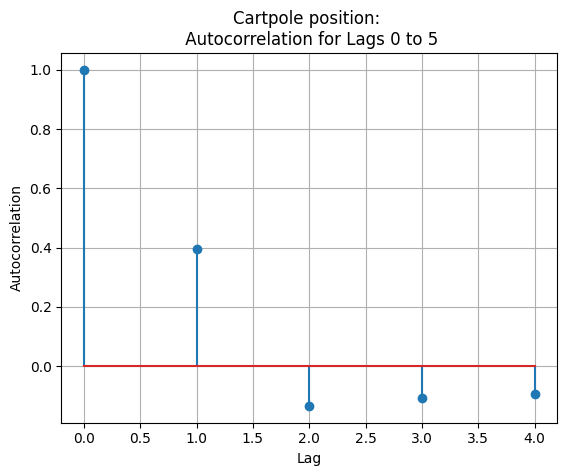

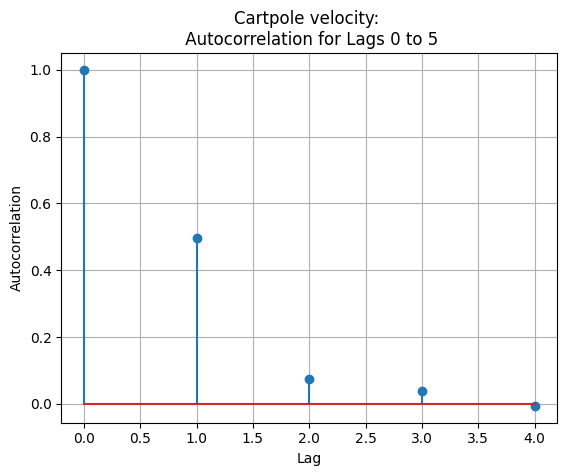

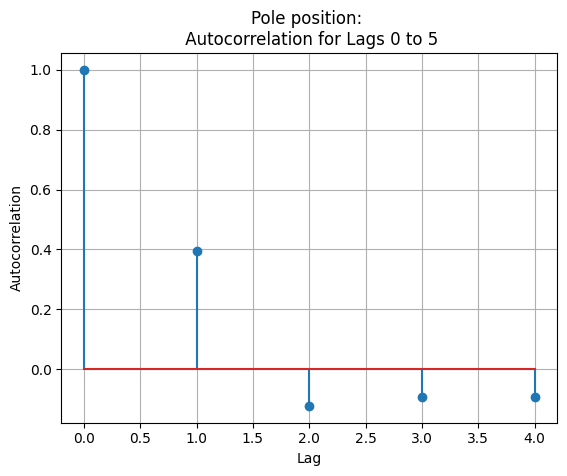

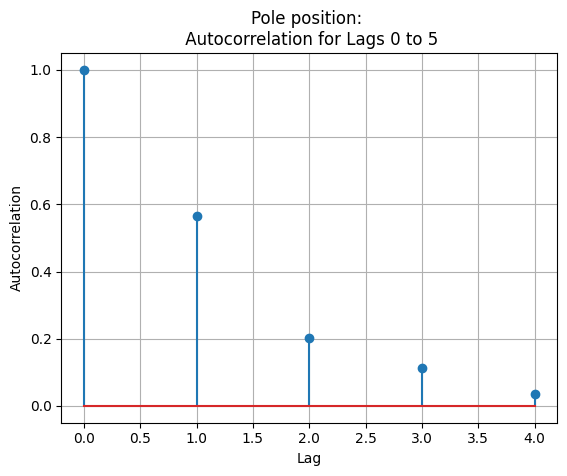

In [29]:
# plot autocorrelations
import matplotlib.pyplot as plt

# Lags from 0 to 5
lags = np.arange(max_lag)

# Plot the autocorrelation scores for lags 0 to 5
plt.stem(lags, fin_autocorr_cart_pos)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Cartpole position: \n Autocorrelation for Lags 0 to 5")
plt.grid(True)
plt.show()


# Plot the autocorrelation scores for lags 0 to 5
plt.stem(lags, fin_autocorr_cart_vel)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Cartpole velocity: \n Autocorrelation for Lags 0 to 5")
plt.grid(True)
plt.show()


# Plot the autocorrelation scores for lags 0 to 5
plt.stem(lags, fin_autocorr_pole_pos)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Pole position: \n Autocorrelation for Lags 0 to 5")
plt.grid(True)
plt.show()


# Plot the autocorrelation scores for lags 0 to 5
plt.stem(lags, fin_autocorr_pole_vel)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Pole position: \n Autocorrelation for Lags 0 to 5")
plt.grid(True)
plt.show()

### IMANO: new implementation

ENVIRONMENT:  <IMANOCartpoleEnv instance>
 
PARAMETERS:
mod_corr_noise: [1.0]
mod_noise_std: 0.1
 
Number of dimensions in the state / observation:  4
Number of autocorrelation lags:  5
 
AUTOCORRELATIONS in each dimension: 

Dim. of observation:  0
Autocorrelations:  [ 1.          0.4723848   0.00552076 -0.00320885 -0.02273454]
 
Dim. of observation:  1
Autocorrelations:  [1.         0.67222521 0.41703824 0.25852819 0.1311884 ]
 
Dim. of observation:  2
Autocorrelations:  [1.         0.5062465  0.07297854 0.05517043 0.01978636]
 
Dim. of observation:  3
Autocorrelations:  [1.         0.69176033 0.45181613 0.28261373 0.14499921]
 


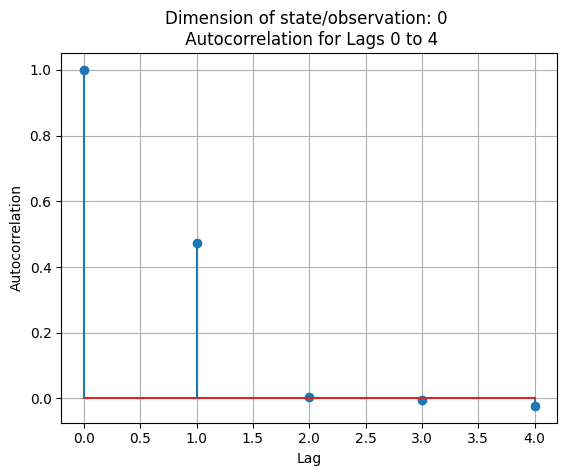

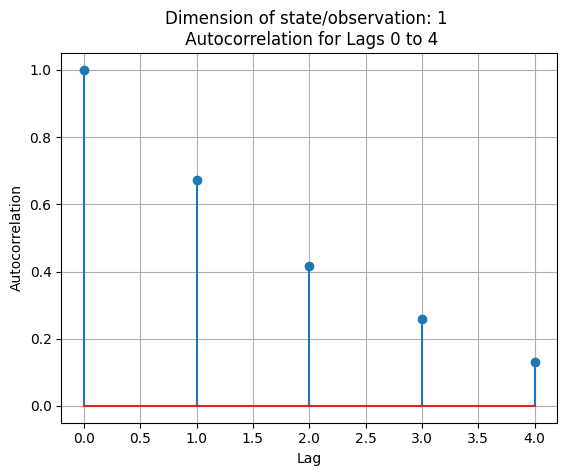

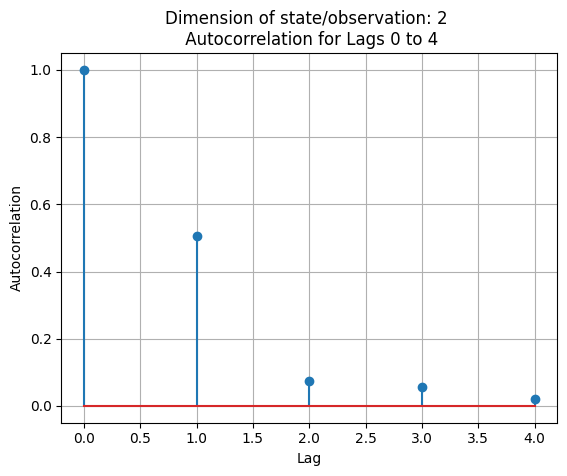

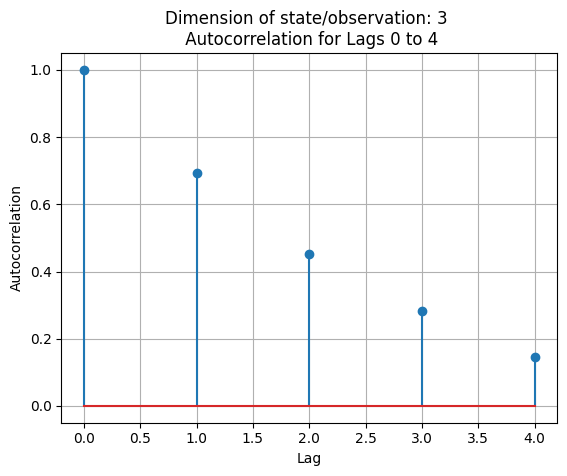

In [22]:
#SCRIPT
#KEY ADVANTAGE: could be applied to any environment (not only cartpole)

import numpy as np
from cartpole import IMANOCartpoleEnv
import statsmodels.api as sm
import matplotlib.pyplot as plt

#IMANO: noising agent observations, not the underlying states
#one step correlation
mod_corr_noise = [1.0]
mod_noise_std = 0.1

env = IMANOCartpoleEnv(mod_corr_noise=mod_corr_noise,
                       mod_noise_std = mod_noise_std)

# Counter for the number of steps in this episode
step_count = 0
# Number of episodes
num_episodes = 1000
#max lag for autocorrelation
max_lag = 5

#find dimensions of the observation space
obs_space = env.observation_space
obs_dimension = obs_space.shape
#KEY: THE LINE BELOW WILL NEED TO BE CHANGED, IF OBS/STATES ARE A MATRIX NOT A VECTOR
obs_dimension = obs_dimension[0]

# Initialize a list, which stores autocorrelations along each observation dimension
episode_autocorr = []
all_autocorr = []
for dim in range(obs_dimension):
    all_autocorr.append(np.zeros((num_episodes, max_lag)))
    
for episode in range(num_episodes):
    # Reset the environment to start a new episode
    observation = env.reset()
    #added this, because otherwise it carries an empty dict
    observation = observation[0]

    # Initialize lists to store trajectories for each dimension of observation for this episode
    list_observations = []
    for dim in range(obs_dimension):
        list_observations.append([])

    actions = []
    rewards = []
    step_count = 0

    # Run the episode until it is terminated
    terminated = False
    while not terminated:
        
        # Sample an action (in this example, we are taking random actions)
        action = env.action_space.sample()
        
        # Perform the action and receive the new observation, reward, termination, and info
        new_observation, reward, terminated, truncated, info = env.step(action)

        for dim in range(obs_dimension):
            list_observations[dim].append(observation[dim])
    
        actions.append(action)
        rewards.append(reward)
    
        # Increment the step count
        step_count += 1
        
        # Update the observation for the next step
        observation = new_observation

    #once an episode terminates: find the autocorrelations in each dimension
    #store them
    for dim in range(obs_dimension):
        trajectories = list_observations[dim]
        episode_autocorr = sm.tsa.acf(trajectories, nlags = max_lag - 1)
        all_autocorr[dim][episode, ] = episode_autocorr
    
    episode += 1
    
# Close the environment
env.close()

print("ENVIRONMENT: ", env)
print(" ")
print("PARAMETERS:")
print("mod_corr_noise:", mod_corr_noise)
print("mod_noise_std:", mod_noise_std)
print(" ")
print("Number of dimensions in the state / observation: ", obs_dimension)
print("Number of autocorrelation lags: ", max_lag)
print(" ")
print("AUTOCORRELATIONS in each dimension: \n")
for dim in range(obs_dimension):
    final_autocorr = np.mean(all_autocorr[dim], axis=0)
    print("Dim. of observation: ", dim)
    print("Autocorrelations: ", final_autocorr)
    print(" ")

# plot autocorrelations
lags = np.arange(max_lag)
for dim in range(obs_dimension):
    final_autocorr = np.mean(all_autocorr[dim], axis=0)
    # Plot the autocorrelation scores for lags 0 to 5
    plt.stem(lags, final_autocorr)
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.title(f"Dimension of state/observation: {dim} \n Autocorrelation for Lags 0 to 4")
    plt.grid(True)
    plt.show()

### IMANS: New implementation

**IMP NOTE: IMANS changes the underlying state of the environment. So you have to be careful about mod_noise_std, since the same value can have a much larger (negative) effect on the performance of the agent, compared to IMANO. This usually results in an error running the code below, eg**:

```ValueError: could not broadcast input array from shape (4,) into shape (5,)```

ENVIRONMENT:  <IMANSCartpoleEnv instance>
 
PARAMETERS:
mod_corr_noise: [1.0]
mod_noise_std: 0.01
 
Number of dimensions in the state / observation:  4
Number of autocorrelation lags:  5
 
AUTOCORRELATIONS in each dimension: 

Dim. of observation:  0
Autocorrelations:  [1.         0.78798442 0.55568998 0.36123434 0.20207839]
 
Dim. of observation:  1
Autocorrelations:  [1.         0.67401984 0.43229842 0.24462962 0.1056506 ]
 
Dim. of observation:  2
Autocorrelations:  [1.         0.79050754 0.58518065 0.40349071 0.24502656]
 
Dim. of observation:  3
Autocorrelations:  [1.         0.68388971 0.44425906 0.25859571 0.1185353 ]
 


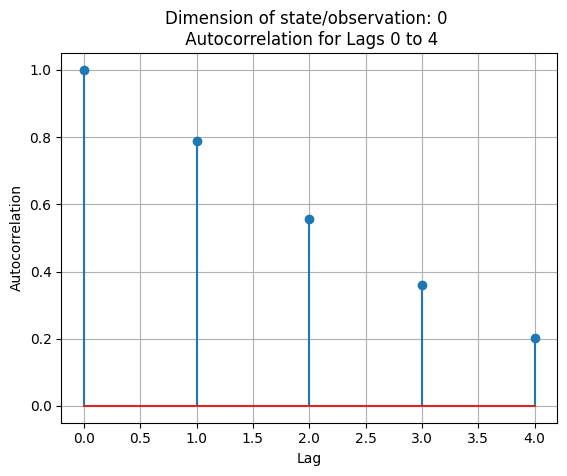

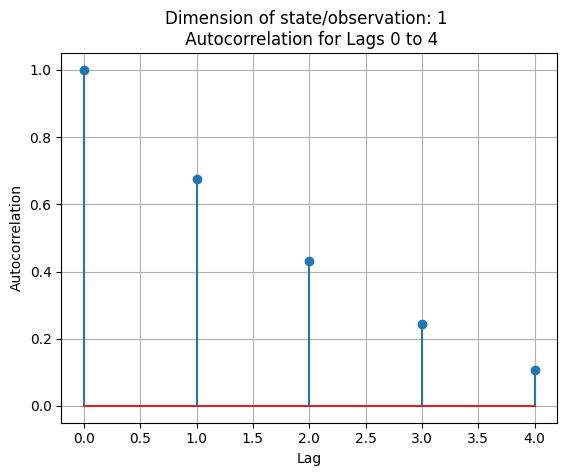

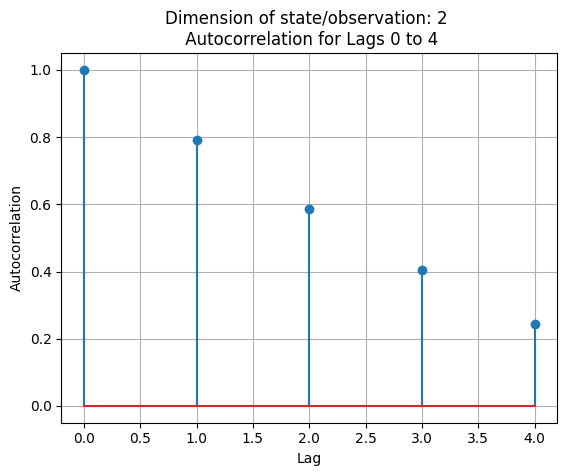

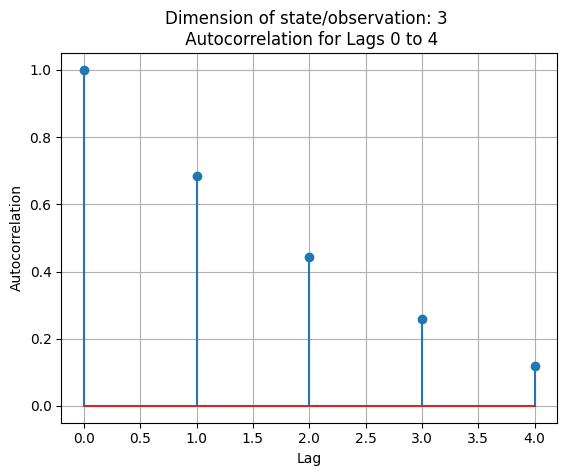

In [11]:
#SCRIPT
#KEY ADVANTAGE: could be applied to any environment (not only cartpole)

import numpy as np
from cartpole import IMANSCartpoleEnv
import statsmodels.api as sm
import matplotlib.pyplot as plt

#IMANO: noising agent observations, not the underlying states
#one step correlation
mod_corr_noise = [1.0]
mod_noise_std = 0.01

env = IMANSCartpoleEnv(mod_corr_noise=mod_corr_noise,
                       mod_noise_std = mod_noise_std)

# Counter for the number of steps in this episode
step_count = 0
# Number of episodes
num_episodes = 1000
#max lag for autocorrelation
max_lag = 5

#find dimensions of the observation space
obs_space = env.observation_space
obs_dimension = obs_space.shape
obs_dimension = obs_dimension[0]

# Initialize a list, which stores autocorrelations along each observation dimension
episode_autocorr = []
all_autocorr = []
for dim in range(obs_dimension):
    all_autocorr.append(np.zeros((num_episodes, max_lag)))
    
for episode in range(num_episodes):
    # Reset the environment to start a new episode
    observation = env.reset()
    #added this, because otherwise it carries an empty dict
    observation = observation[0]

    # Initialize lists to store trajectories for each dimension of observation for this episode
    list_observations = []
    for dim in range(obs_dimension):
        list_observations.append([])

    actions = []
    rewards = []
    step_count = 0

    # Run the episode until it is terminated
    terminated = False
    while not terminated:
        
        # Sample an action (in this example, we are taking random actions)
        action = env.action_space.sample()
        
        # Perform the action and receive the new observation, reward, termination, and info
        new_observation, reward, terminated, truncated, info = env.step(action)

        for dim in range(obs_dimension):
            list_observations[dim].append(observation[dim])
    
        actions.append(action)
        rewards.append(reward)
    
        # Increment the step count
        step_count += 1
        
        # Update the observation for the next step
        observation = new_observation

    #once an episode terminates: find the autocorrelations in each dimension
    #store them
    for dim in range(obs_dimension):
        trajectories = list_observations[dim]
        episode_autocorr = sm.tsa.acf(trajectories, nlags = max_lag - 1)
        all_autocorr[dim][episode, ] = episode_autocorr
    
    episode += 1
    
# Close the environment
env.close()

print("ENVIRONMENT: ", env)
print(" ")
print("PARAMETERS:")
print("mod_corr_noise:", mod_corr_noise)
print("mod_noise_std:", mod_noise_std)
print(" ")
print("Number of dimensions in the state / observation: ", obs_dimension)
print("Number of autocorrelation lags: ", max_lag)
print(" ")
print("AUTOCORRELATIONS in each dimension: \n")
for dim in range(obs_dimension):
    final_autocorr = np.mean(all_autocorr[dim], axis=0)
    print("Dim. of observation: ", dim)
    print("Autocorrelations: ", final_autocorr)
    print(" ")

# plot autocorrelations
lags = np.arange(max_lag)
for dim in range(obs_dimension):
    final_autocorr = np.mean(all_autocorr[dim], axis=0)
    # Plot the autocorrelation scores for lags 0 to 5
    plt.stem(lags, final_autocorr)
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.title(f"Dimension of state/observation: {dim} \n Autocorrelation for Lags 0 to 4")
    plt.grid(True)
    plt.show()

# III. Excess autocorrelation: manual implementation

## Goal
Goal: compare the autocorrelation levels in environment with uncorrelated noise vs. correlated noise (env with uncorrelted noise still has correlation between states)

## Definition: excess autocorrelation
### Xi Dong, Massimo Massa, 2014
Source: https://www.aeaweb.org/conference/2014/retrieve.php?pdfid=1275

Definition:

P.2: words

*Dynamic excess autocorrelation (DEA). DEA is defined as the difference between the autocorrelation of actual daily fund returns and the autocorrelation of a hypothetical portfolio that invests  in  the  previously  disclosed  fund  holdings.*

P.13: equation

*The DEA of a month m is the difference between AA and RA. The DEA is a proxy of the difference between corr_new and corr_old.* [see equation]

## Implementation: 
### No correlated noise

ENVIRONMENT:  <IMANSCartpoleEnv instance>
 
PARAMETERS:
mod_corr_noise: [0.0]
mod_noise_std: 0.0
 
Number of dimensions in the state / observation:  4
Number of autocorrelation lags:  5
 
AUTOCORRELATIONS in each dimension: 

Dim. of observation:  0
Autocorrelations:  [1.         0.81947287 0.63305209 0.45191057 0.28458091]
 
Dim. of observation:  1
Autocorrelations:  [1.         0.67642594 0.43544881 0.25164111 0.11695158]
 
Dim. of observation:  2
Autocorrelations:  [1.         0.80914633 0.62041586 0.44153485 0.27853176]
 
Dim. of observation:  3
Autocorrelations:  [1.         0.68521352 0.44856138 0.26656637 0.13161485]
 


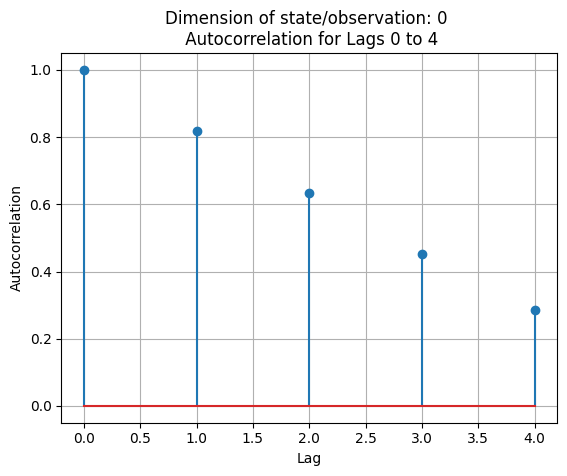

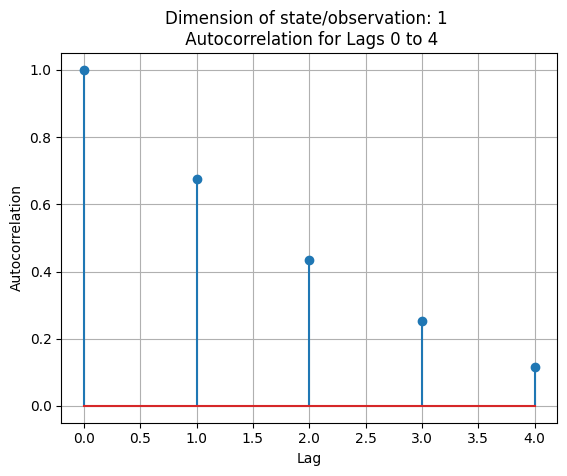

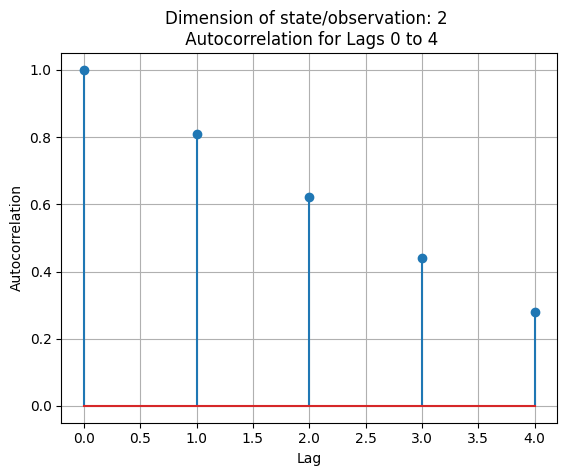

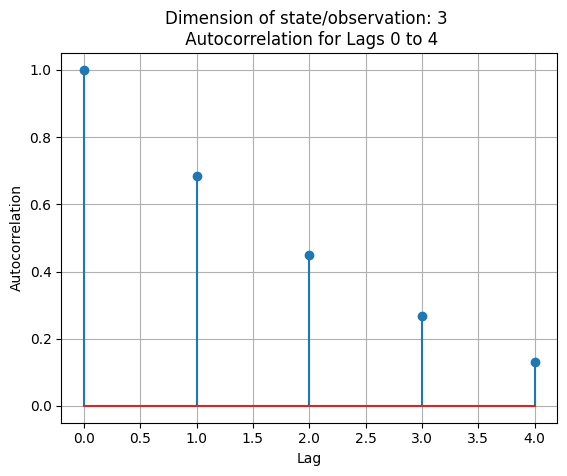

In [15]:
#SCRIPT
#KEY ADVANTAGE: could be applied to any environment (not only cartpole)

import numpy as np
from cartpole import IMANSCartpoleEnv
import statsmodels.api as sm
import matplotlib.pyplot as plt

#IMANO: noising agent observations, not the underlying states
#one step correlation
mod_corr_noise = [0.0]
mod_noise_std = 0.0

env = IMANSCartpoleEnv(mod_corr_noise=mod_corr_noise,
                       mod_noise_std = mod_noise_std)

# Counter for the number of steps in this episode
step_count = 0
# Number of episodes
num_episodes = 1000
#max lag for autocorrelation
max_lag = 5

#find dimensions of the observation space
obs_space = env.observation_space
obs_dimension = obs_space.shape
obs_dimension = obs_dimension[0]

# Initialize a list, which stores autocorrelations along each observation dimension
episode_autocorr = []
all_autocorr = []
for dim in range(obs_dimension):
    all_autocorr.append(np.zeros((num_episodes, max_lag)))
    
for episode in range(num_episodes):
    # Reset the environment to start a new episode
    observation = env.reset()
    #added this, because otherwise it carries an empty dict
    observation = observation[0]

    # Initialize lists to store trajectories for each dimension of observation for this episode
    list_observations = []
    for dim in range(obs_dimension):
        list_observations.append([])

    actions = []
    rewards = []
    step_count = 0

    # Run the episode until it is terminated
    terminated = False
    while not terminated:
        
        # Sample an action (in this example, we are taking random actions)
        action = env.action_space.sample()
        
        # Perform the action and receive the new observation, reward, termination, and info
        new_observation, reward, terminated, truncated, info = env.step(action)

        for dim in range(obs_dimension):
            list_observations[dim].append(observation[dim])
    
        actions.append(action)
        rewards.append(reward)
    
        # Increment the step count
        step_count += 1
        
        # Update the observation for the next step
        observation = new_observation

    #once an episode terminates: find the autocorrelations in each dimension
    #store them
    for dim in range(obs_dimension):
        trajectories = list_observations[dim]
        episode_autocorr = sm.tsa.acf(trajectories, nlags = max_lag - 1)
        all_autocorr[dim][episode, ] = episode_autocorr
    
    episode += 1
    
# Close the environment
env.close()

print("ENVIRONMENT: ", env)
print(" ")
print("PARAMETERS:")
print("mod_corr_noise:", mod_corr_noise)
print("mod_noise_std:", mod_noise_std)
print(" ")
print("Number of dimensions in the state / observation: ", obs_dimension)
print("Number of autocorrelation lags: ", max_lag)
print(" ")
print("AUTOCORRELATIONS in each dimension: \n")
for dim in range(obs_dimension):
    final_autocorr = np.mean(all_autocorr[dim], axis=0)
    print("Dim. of observation: ", dim)
    print("Autocorrelations: ", final_autocorr)
    print(" ")

# plot autocorrelations
lags = np.arange(max_lag)
for dim in range(obs_dimension):
    final_autocorr = np.mean(all_autocorr[dim], axis=0)
    # Plot the autocorrelation scores for lags 0 to 5
    plt.stem(lags, final_autocorr)
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.title(f"Dimension of state/observation: {dim} \n Autocorrelation for Lags 0 to 4")
    plt.grid(True)
    plt.show()

## Implementation: IMANO
- First, run the environment with uncorrelated noise. Save the autocorrelation array
- Then, run the environment with correlated noise. Save the autocorrelation array
- Find their difference. Print it. Plot it. 

===BASELINE: NO CORRELATED NOISE===
ENVIRONMENT:  <IMANOCartpoleEnv instance>
 
PARAMETERS:
mod_corr_noise: [0.0]
mod_noise_std: 1
 
Number of dimensions in the state / observation:  4
Number of autocorrelation lags:  5
 
AUTOCORRELATIONS in each dimension:
Dim. of observation:  0
Autocorrelations:  [ 1.         -0.05870264 -0.05338243 -0.04774953 -0.03351021]
 
Dim. of observation:  1
Autocorrelations:  [ 1.          0.0377216   0.01151716 -0.008716   -0.0147501 ]
 
Dim. of observation:  2
Autocorrelations:  [ 1.         -0.050432   -0.05239206 -0.04483424 -0.03264488]
 
Dim. of observation:  3
Autocorrelations:  [1.         0.12508603 0.07868611 0.03363755 0.00447175]
 
===MODIFIED ENV: CORRELATED NOISE===
ENVIRONMENT:  <IMANOCartpoleEnv instance>
 
PARAMETERS:
mod_corr_noise: [1.0]
mod_noise_std: 1
 
Number of dimensions in the state / observation:  4
Number of autocorrelation lags:  5
 
AUTOCORRELATIONS in each dimension:
Dim. of observation:  0
Autocorrelations:  [ 1.          0.3

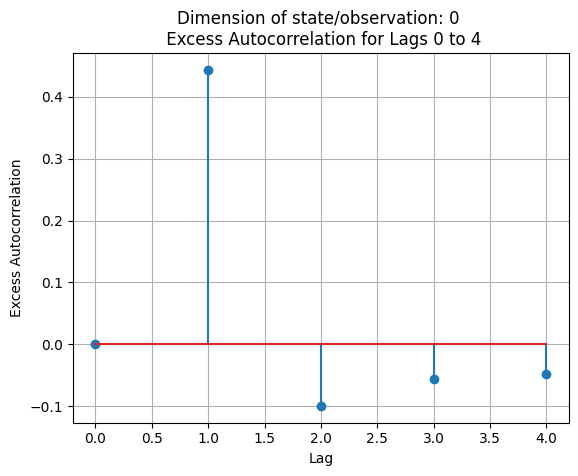

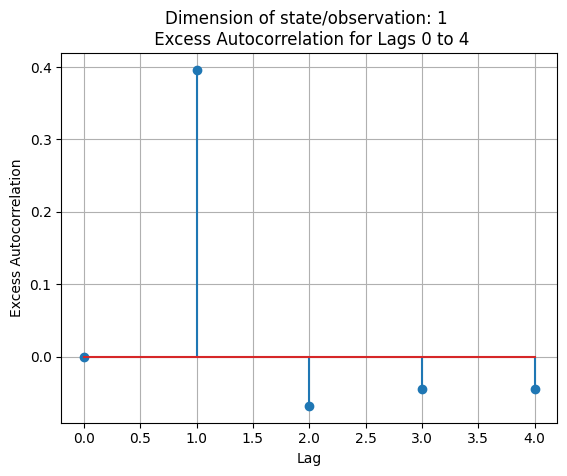

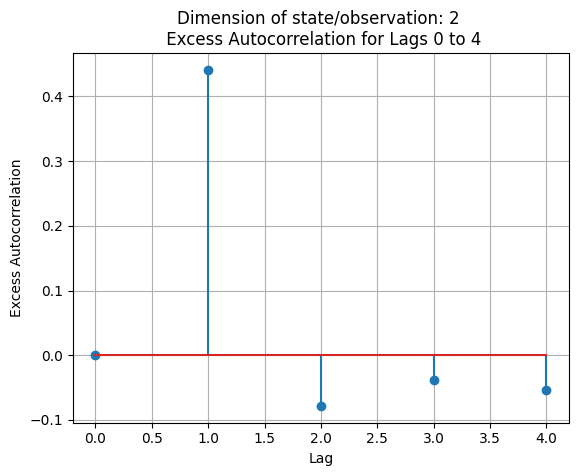

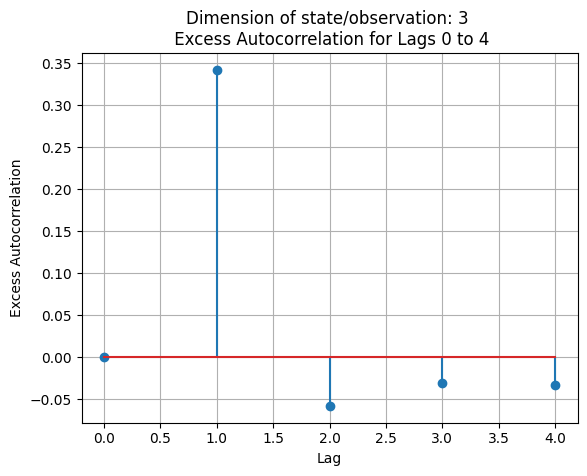

In [25]:
#IMANO SCRIPT
import numpy as np
from cartpole import IMANOCartpoleEnv
import statsmodels.api as sm
import matplotlib.pyplot as plt

#===HYPERPARAMS===
# Number of episodes
num_episodes = 1000
#max lag for autocorrelation
max_lag = 5

#IMANO: noising agent observations, not the underlying states
#one step correlation
mod_corr_noise = [1.0]
mod_noise_std = 1


#===RUN ENV WITH UNCORRELATED NOISE===
#same mod_noise_std, diff noise
mod_corr_noise_BASELINE = [0.0]
env_BASELINE = IMANOCartpoleEnv(mod_corr_noise=mod_corr_noise_BASELINE,
                               mod_noise_std = mod_noise_std)

#find dimensions of the observation space
obs_space = env_BASELINE.observation_space
obs_dimension = obs_space.shape
obs_dimension = obs_dimension[0]

step_count = 0

# Initialize a list, which stores autocorrelations along each observation dimension
episode_autocorr_BASELINE = []
all_autocorr_BASELINE = []
for dim in range(obs_dimension):
    all_autocorr_BASELINE.append(np.zeros((num_episodes, max_lag)))
    
for episode in range(num_episodes):
    # Reset the environment to start a new episode
    observation = env_BASELINE.reset()
    #added this, because otherwise it carries an empty dict
    observation = observation[0]

    # Initialize lists to store trajectories for each dimension of observation for this episode
    list_observations_BASELINE = []
    for dim in range(obs_dimension):
        list_observations_BASELINE.append([])

    actions = []
    rewards = []
    step_count = 0

    # Run the episode until it is terminated
    terminated = False
    while not terminated:
        
        # Sample an action (in this example, we are taking random actions)
        action = env_BASELINE.action_space.sample()
        
        # Perform the action and receive the new observation, reward, termination, and info
        new_observation, reward, terminated, truncated, info = env_BASELINE.step(action)

        for dim in range(obs_dimension):
            list_observations_BASELINE[dim].append(observation[dim])
    
        actions.append(action)
        rewards.append(reward)
    
        # Increment the step count
        step_count += 1
        
        # Update the observation for the next step
        observation = new_observation

    #once an episode terminates: find the autocorrelations in each dimension
    #store them
    for dim in range(obs_dimension):
        trajectories_BASELINE = list_observations_BASELINE[dim]
        episode_autocorr_BASELINE = sm.tsa.acf(trajectories_BASELINE, nlags = max_lag - 1)
        all_autocorr_BASELINE[dim][episode, ] = episode_autocorr_BASELINE
    
    episode += 1

# Close the environment
env_BASELINE.close()


#===RUN IMANO ENV===
env = IMANOCartpoleEnv(mod_corr_noise=mod_corr_noise,
                       mod_noise_std = mod_noise_std)

# Counter for the number of steps in this episode
step_count = 0

#find dimensions of the observation space
obs_space = env.observation_space
obs_dimension = obs_space.shape
obs_dimension = obs_dimension[0]

# Initialize a list, which stores autocorrelations along each observation dimension
episode_autocorr = []
all_autocorr = []
for dim in range(obs_dimension):
    all_autocorr.append(np.zeros((num_episodes, max_lag)))
    
for episode in range(num_episodes):
    # Reset the environment to start a new episode
    observation = env.reset()
    #added this, because otherwise it carries an empty dict
    observation = observation[0]

    # Initialize lists to store trajectories for each dimension of observation for this episode
    list_observations = []
    for dim in range(obs_dimension):
        list_observations.append([])

    actions = []
    rewards = []
    step_count = 0

    # Run the episode until it is terminated
    terminated = False
    while not terminated:
        
        # Sample an action (in this example, we are taking random actions)
        action = env.action_space.sample()
        
        # Perform the action and receive the new observation, reward, termination, and info
        new_observation, reward, terminated, truncated, info = env.step(action)

        for dim in range(obs_dimension):
            list_observations[dim].append(observation[dim])
    
        actions.append(action)
        rewards.append(reward)
    
        # Increment the step count
        step_count += 1
        
        # Update the observation for the next step
        observation = new_observation

    #once an episode terminates: find the autocorrelations in each dimension
    #store them
    for dim in range(obs_dimension):
        trajectories = list_observations[dim]
        episode_autocorr = sm.tsa.acf(trajectories, nlags = max_lag - 1)
        all_autocorr[dim][episode, ] = episode_autocorr
    
    episode += 1
    
# Close the environment
env.close()

#===PRINT OUT RESULTS===
print("===BASELINE: NO CORRELATED NOISE===")
print("ENVIRONMENT: ", env_BASELINE)
print(" ")
print("PARAMETERS:")
print("mod_corr_noise:", mod_corr_noise_BASELINE)
print("mod_noise_std:", mod_noise_std)
print(" ")
print("Number of dimensions in the state / observation: ", obs_dimension)
print("Number of autocorrelation lags: ", max_lag)
print(" ")
print("AUTOCORRELATIONS in each dimension:")
for dim in range(obs_dimension):
    final_autocorr_BASELINE = np.mean(all_autocorr_BASELINE[dim], axis=0)
    print("Dim. of observation: ", dim)
    print("Autocorrelations: ", final_autocorr_BASELINE)
    print(" ")


print("===MODIFIED ENV: CORRELATED NOISE===")   
print("ENVIRONMENT: ", env)
print(" ")
print("PARAMETERS:")
print("mod_corr_noise:", mod_corr_noise)
print("mod_noise_std:", mod_noise_std)
print(" ")
print("Number of dimensions in the state / observation: ", obs_dimension)
print("Number of autocorrelation lags: ", max_lag)
print(" ")
print("AUTOCORRELATIONS in each dimension:")
for dim in range(obs_dimension):
    final_autocorr = np.mean(all_autocorr[dim], axis=0)
    print("Dim. of observation: ", dim)
    print("Autocorrelations: ", final_autocorr)
    print(" ")


print("===EXCESS CORRELATION===")   
for dim in range(obs_dimension):
    final_autocorr_BASELINE = np.mean(all_autocorr_BASELINE[dim], axis=0)
    final_autocorr = np.mean(all_autocorr[dim], axis=0)
    excess_autocorr = final_autocorr - final_autocorr_BASELINE
    
    print("Dim. of observation: ", dim)
    print("Excess autocorrelation: ", excess_autocorr)
    print(" ")

#===PLOT RESULTS===
# plot excess autocorrelations
lags = np.arange(max_lag)
for dim in range(obs_dimension):
    final_autocorr_BASELINE = np.mean(all_autocorr_BASELINE[dim], axis=0)
    final_autocorr = np.mean(all_autocorr[dim], axis=0)
    excess_autocorr = final_autocorr - final_autocorr_BASELINE
    
    # Plot the autocorrelation scores for lags 0 to 5
    plt.stem(lags, excess_autocorr)
    plt.xlabel("Lag")
    plt.ylabel("Excess Autocorrelation")
    plt.title(f"Dimension of state/observation: {dim} \n Excess Autocorrelation for Lags 0 to 4")
    plt.grid(True)
    plt.show()

Main insight:
The higher the standard deviation of noise:

- The higher the difference of autocorrelation between the chosen lag (eg lag 1) and the rest. Ie the autocorrelation becomes more precise. 
- The lower the autocorrelation in the environment where noise is uncorrelated (observations are more noisy, so less general correlation / dependency). 
- Result: the higher the excess autocorrelation (pushed by both)

To see this: run the same code with st dev of noise at 0.1 vs 1. 

## IMANS script

In [1]:
#IMANO SCRIPT
import numpy as np
from cartpole import IMANSCartpoleEnv
import statsmodels.api as sm
import matplotlib.pyplot as plt

#===HYPERPARAMS===
# Number of episodes
num_episodes = 1000
#max lag for autocorrelation
max_lag = 5

#IMANO: noising agent observations, not the underlying states
#one step correlation
mod_corr_noise = [1.0]
mod_noise_std = 0.02


#===RUN ENV WITH UNCORRELATED NOISE===
#same mod_noise_std, diff noise
mod_corr_noise_BASELINE = [0.0]
env_BASELINE = IMANSCartpoleEnv(mod_corr_noise=mod_corr_noise_BASELINE,
                               mod_noise_std = mod_noise_std)

#find dimensions of the observation space
obs_space = env_BASELINE.observation_space
obs_dimension = obs_space.shape
obs_dimension = obs_dimension[0]

step_count = 0

# Initialize a list, which stores autocorrelations along each observation dimension
episode_autocorr_BASELINE = []
all_autocorr_BASELINE = []
for dim in range(obs_dimension):
    all_autocorr_BASELINE.append(np.zeros((num_episodes, max_lag)))
    
for episode in range(num_episodes):
    # Reset the environment to start a new episode
    observation = env_BASELINE.reset()
    #added this, because otherwise it carries an empty dict
    observation = observation[0]

    # Initialize lists to store trajectories for each dimension of observation for this episode
    list_observations_BASELINE = []
    for dim in range(obs_dimension):
        list_observations_BASELINE.append([])

    actions = []
    rewards = []
    step_count = 0

    # Run the episode until it is terminated
    terminated = False
    while not terminated:
        
        # Sample an action (in this example, we are taking random actions)
        action = env_BASELINE.action_space.sample()
        
        # Perform the action and receive the new observation, reward, termination, and info
        new_observation, reward, terminated, truncated, info = env_BASELINE.step(action)

        for dim in range(obs_dimension):
            list_observations_BASELINE[dim].append(observation[dim])
    
        actions.append(action)
        rewards.append(reward)
    
        # Increment the step count
        step_count += 1
        
        # Update the observation for the next step
        observation = new_observation

    #once an episode terminates: find the autocorrelations in each dimension
    #store them
    for dim in range(obs_dimension):
        trajectories_BASELINE = list_observations_BASELINE[dim]
        episode_autocorr_BASELINE = sm.tsa.acf(trajectories_BASELINE, nlags = max_lag - 1)
        all_autocorr_BASELINE[dim][episode, ] = episode_autocorr_BASELINE
    
    episode += 1

# Close the environment
env_BASELINE.close()


#===RUN IMANO ENV===
env = IMANSCartpoleEnv(mod_corr_noise=mod_corr_noise,
                       mod_noise_std = mod_noise_std)

# Counter for the number of steps in this episode
step_count = 0

#find dimensions of the observation space
obs_space = env.observation_space
obs_dimension = obs_space.shape
obs_dimension = obs_dimension[0]

# Initialize a list, which stores autocorrelations along each observation dimension
episode_autocorr = []
all_autocorr = []
for dim in range(obs_dimension):
    all_autocorr.append(np.zeros((num_episodes, max_lag)))
    
for episode in range(num_episodes):
    # Reset the environment to start a new episode
    observation = env.reset()
    #added this, because otherwise it carries an empty dict
    observation = observation[0]

    # Initialize lists to store trajectories for each dimension of observation for this episode
    list_observations = []
    for dim in range(obs_dimension):
        list_observations.append([])

    actions = []
    rewards = []
    step_count = 0

    # Run the episode until it is terminated
    terminated = False
    while not terminated:
        
        # Sample an action (in this example, we are taking random actions)
        action = env.action_space.sample()
        
        # Perform the action and receive the new observation, reward, termination, and info
        new_observation, reward, terminated, truncated, info = env.step(action)

        for dim in range(obs_dimension):
            list_observations[dim].append(observation[dim])
    
        actions.append(action)
        rewards.append(reward)
    
        # Increment the step count
        step_count += 1
        
        # Update the observation for the next step
        observation = new_observation

    #once an episode terminates: find the autocorrelations in each dimension
    #store them
    for dim in range(obs_dimension):
        trajectories = list_observations[dim]
        episode_autocorr = sm.tsa.acf(trajectories, nlags = max_lag - 1)
        all_autocorr[dim][episode, ] = episode_autocorr
    
    episode += 1
    
# Close the environment
env.close()

#===PRINT OUT RESULTS===
print("===BASELINE: NO CORRELATED NOISE===")
print("ENVIRONMENT: ", env_BASELINE)
print(" ")
print("PARAMETERS:")
print("mod_corr_noise:", mod_corr_noise_BASELINE)
print("mod_noise_std:", mod_noise_std)
print(" ")
print("Number of dimensions in the state / observation: ", obs_dimension)
print("Number of autocorrelation lags: ", max_lag)
print(" ")
print("AUTOCORRELATIONS in each dimension:")
for dim in range(obs_dimension):
    final_autocorr_BASELINE = np.mean(all_autocorr_BASELINE[dim], axis=0)
    print("Dim. of observation: ", dim)
    print("Autocorrelations: ", final_autocorr_BASELINE)
    print(" ")


print("===MODIFIED ENV: CORRELATED NOISE===")   
print("ENVIRONMENT: ", env)
print(" ")
print("PARAMETERS:")
print("mod_corr_noise:", mod_corr_noise)
print("mod_noise_std:", mod_noise_std)
print(" ")
print("Number of dimensions in the state / observation: ", obs_dimension)
print("Number of autocorrelation lags: ", max_lag)
print(" ")
print("AUTOCORRELATIONS in each dimension:")
for dim in range(obs_dimension):
    final_autocorr = np.mean(all_autocorr[dim], axis=0)
    print("Dim. of observation: ", dim)
    print("Autocorrelations: ", final_autocorr)
    print(" ")


print("===EXCESS CORRELATION===")   
for dim in range(obs_dimension):
    final_autocorr_BASELINE = np.mean(all_autocorr_BASELINE[dim], axis=0)
    final_autocorr = np.mean(all_autocorr[dim], axis=0)
    excess_autocorr = final_autocorr - final_autocorr_BASELINE
    
    print("Dim. of observation: ", dim)
    print("Excess autocorrelation: ", excess_autocorr)
    print(" ")

#===PLOT RESULTS===
# plot excess autocorrelations
lags = np.arange(max_lag)
for dim in range(obs_dimension):
    final_autocorr_BASELINE = np.mean(all_autocorr_BASELINE[dim], axis=0)
    final_autocorr = np.mean(all_autocorr[dim], axis=0)
    excess_autocorr = final_autocorr - final_autocorr_BASELINE
    
    # Plot the autocorrelation scores for lags 0 to 5
    plt.stem(lags, excess_autocorr)
    plt.xlabel("Lag")
    plt.ylabel("Excess Autocorrelation")
    plt.title(f"Dimension of state/observation: {dim} \n Excess Autocorrelation for Lags 0 to 4")
    plt.grid(True)
    plt.show()

TypeError: IMANSCartpoleEnv.__init__() got an unexpected keyword argument 'mod_corr_noise'

## IV. Implementation of time series, plots, and excess autocorrelation in IMANO/IMANS with FUNCTIONS
Goal: put everything into functions

In [3]:
import numpy as np
from cartpole import IMANSCartpoleEnv, IMANOCartpoleEnv
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [34]:
def get_autocorrelations(env_name, mod_corr_noise, mod_noise_std, max_lag, num_episodes):
    """
    input:
    - env_name: string. "IMANSCartpoleEnv" or "IMANOCartpoleEnv"
    - mod_corr_noise: list of integers. [0.0] for env with uncorrelated noise, [1.0] for one step corr, 
    [0.0, 1.0] for only 2-step corr, [1.0, 1.0] for 1 and 2 step corr, etc
    - mod_noise_std: int. Note: values for IMANSCartpoleEnv should generally be lower IMANSCartpoleEnv
    than for IMANOCartpoleEnv, e.g. 1.0 works for IMANOCartpoleEnv, but will break IMANSCartpoleEnv
    default: 0.1 for IMANOCartpoleEnv, 0.01 for IMANSCartpoleEnv
    - max_lag: maximum autoc-correlation lag to consider. 
    
    output: all_autocorr, a list where each element is a np.array with autocorrelations for each dim
    to run an env 
    """
    
    #initialize env
    if env_name == "IMANOCartpoleEnv":
        env = IMANOCartpoleEnv(mod_corr_noise=mod_corr_noise,
                               mod_noise_std = mod_noise_std)
        
    elif env_name == "IMANOCartpoleEnv":
        env = IMANSCartpoleEnv(mod_corr_noise=mod_corr_noise,
                               mod_noise_std = mod_noise_std)

    else:
        print("ERROR: env_name can only be  'IMANSCartpoleEnv' or 'IMANOCartpoleEnv'")
        return
        
    # Counter for the number of steps in this episode
    step_count = 0
    #find dimensions of the observation space
    obs_space = env.observation_space
    obs_dimension = obs_space.shape
    obs_dimension = obs_dimension[0]
    
    # mod_corr_noise = [1.0]
    # mod_noise_std = 0.01

    # Initialize a list, which stores autocorrelations along each observation dimension
    episode_autocorr = []
    all_autocorr = []
    for dim in range(obs_dimension):
        all_autocorr.append(np.zeros((num_episodes, max_lag)))

    #run the loop
    for episode in range(num_episodes):
        # Reset the environment to start a new episode
        observation = env.reset()
        #added this, because otherwise it carries an empty dict
        observation = observation[0]

        # Initialize lists to store trajectories for each dimension of observation for this episode
        list_observations = []
        for dim in range(obs_dimension):
            list_observations.append([])

        actions = []
        rewards = []
        step_count = 0
    
        # Run the episode until it is terminated
        terminated = False
        while not terminated:
            
            # Sample an action (in this example, we are taking random actions)
            action = env.action_space.sample()
            
            # Perform the action and receive the new observation, reward, termination, and info
            new_observation, reward, terminated, truncated, info = env.step(action)

            #store observations from each dim in separate lists
            for dim in range(obs_dimension):
                list_observations[dim].append(observation[dim])
        
            actions.append(action)
            rewards.append(reward)
        
            # Increment the step count
            step_count += 1
            
            # Update the observation for the next step
            observation = new_observation

        #once an episode terminates: find the autocorrelations in each dimension
        #store them
        for dim in range(obs_dimension):
            trajectories = list_observations[dim]
            episode_autocorr = sm.tsa.acf(trajectories, nlags = max_lag - 1)
            all_autocorr[dim][episode, ] = episode_autocorr
        
        episode += 1
    
    # Close the environment
    env.close()

    # Print summary 
    print("ENVIRONMENT: ", env)
    print(" ")
    print("PARAMETERS:")
    print("mod_corr_noise:", mod_corr_noise)
    print("mod_noise_std:", mod_noise_std)
    print(" ")
    print("Number of dimensions in the state / observation: ", obs_dimension)
    print("Number of autocorrelation lags: ", max_lag)
    print(" ")
    print("AUTOCORRELATIONS in each dimension:")
    for dim in range(obs_dimension):
        final_autocorr = np.mean(all_autocorr[dim], axis=0)
        print("Dim. of observation: ", dim)
        print("Autocorrelations: ", final_autocorr)
        print(" ")
        
    return all_autocorr

In [42]:
def get_excess_autocorrelations(env_name, mod_corr_noise, mod_noise_std, max_lag, num_episodes):
    
    list_autocorr = get_autocorrelations(env_name = env_name, 
                                         mod_corr_noise = mod_corr_noise, 
                                         mod_noise_std = mod_noise_std, 
                                         max_lag = max_lag, 
                                         num_episodes = num_episodes)
    
    list_autocorr_BASELINE = get_autocorrelations(env_name = env_name, 
                                                  mod_corr_noise = [0.0], 
                                                  mod_noise_std = mod_noise_std, 
                                                  max_lag = max_lag, 
                                                  num_episodes = num_episodes)

    obs_dimension = len(list_autocorr)
    
    print("===EXCESS CORRELATION===")   
    for dim in range(obs_dimension):
        final_autocorr_BASELINE = np.mean(list_autocorr_BASELINE[dim], axis=0)
        final_autocorr = np.mean(list_autocorr[dim], axis=0)
        excess_autocorr = final_autocorr - final_autocorr_BASELINE
        
        print("Dim. of observation: ", dim)
        print("Excess autocorrelation: ", excess_autocorr)
        print(" ")
        
    return [list_autocorr, list_autocorr_BASELINE]

In [37]:
#PLOTS
def plot_autocorrelations(list_autocorr, max_lag):
    lags = np.arange(max_lag)
    
    obs_dimension = len(list_autocorr)
    
    for dim in range(obs_dimension):
        final_autocorr = np.mean(list_autocorr[dim], axis=0)
        
        # Plot the autocorrelation scores for lags
        plt.stem(lags, final_autocorr)
        plt.xlabel("Lag")
        plt.ylabel("Autocorrelation")
        plt.title(f"Dimension of state/observation: {dim} \n Autocorrelation for lags 0-{max_lag-1}")
        plt.grid(True)
        plt.show()

    return  


def plot_excess_autocorrelations(list_autocorr, list_autocorr_BASELINE, max_lag):
    lags = np.arange(max_lag)
    obs_dimension = len(list_autocorr)
    
    for dim in range(obs_dimension):
        final_autocorr = np.mean(list_autocorr[dim], axis=0)
        final_autocorr_BASELINE = np.mean(list_autocorr_BASELINE[dim], axis=0)
        excess_autocorr = final_autocorr - final_autocorr_BASELINE
        
        # Plot the autocorrelation scores for lags
        plt.stem(lags, excess_autocorr)
        plt.xlabel("Lag")
        plt.ylabel("Excess Autocorrelation")
        plt.title(f"Dimension of state/observation: {dim} \n Excess Autocorrelation for lags 0-{max_lag-1}")
        plt.grid(True)
        plt.show()

    return  

In [40]:
#test
autocorr = get_autocorrelations(env_name = "IMANOCartpoleEnv", 
                     mod_corr_noise = [1.0], 
                     mod_noise_std = 1.0, 
                     max_lag = 5, 
                     num_episodes = 1000)

autocorr_BASELINE = get_autocorrelations(env_name = "IMANOCartpoleEnv", 
                     mod_corr_noise = [0.0], 
                     mod_noise_std = 1.0, 
                     max_lag = 5, 
                     num_episodes = 1000)

ENVIRONMENT:  <IMANOCartpoleEnv instance>
 
PARAMETERS:
mod_corr_noise: [1.0]
mod_noise_std: 1.0
 
Number of dimensions in the state / observation:  4
Number of autocorrelation lags:  5
 
AUTOCORRELATIONS in each dimension:
Dim. of observation:  0
Autocorrelations:  [ 1.          0.40119889 -0.12353579 -0.08653269 -0.07808593]
 
Dim. of observation:  1
Autocorrelations:  [ 1.          0.43785767 -0.0551512  -0.0521976  -0.06530688]
 
Dim. of observation:  2
Autocorrelations:  [ 1.          0.39507021 -0.15142345 -0.12203051 -0.09749672]
 
Dim. of observation:  3
Autocorrelations:  [ 1.00000000e+00  4.77427786e-01  2.35436683e-02  2.94496039e-04
 -2.77594438e-02]
 
ENVIRONMENT:  <IMANOCartpoleEnv instance>
 
PARAMETERS:
mod_corr_noise: [0.0]
mod_noise_std: 1.0
 
Number of dimensions in the state / observation:  4
Number of autocorrelation lags:  5
 
AUTOCORRELATIONS in each dimension:
Dim. of observation:  0
Autocorrelations:  [ 1.         -0.05821402 -0.04968336 -0.0509308  -0.0382785 

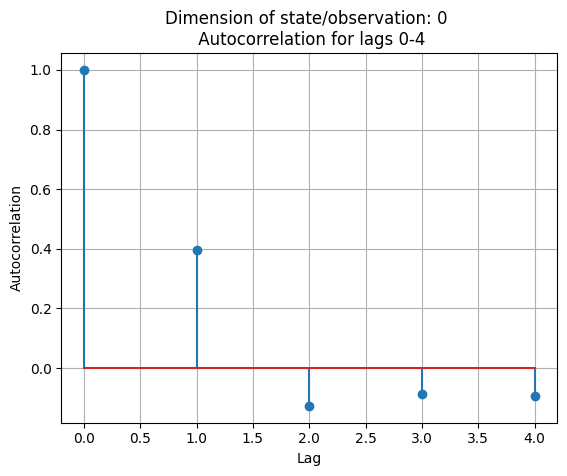

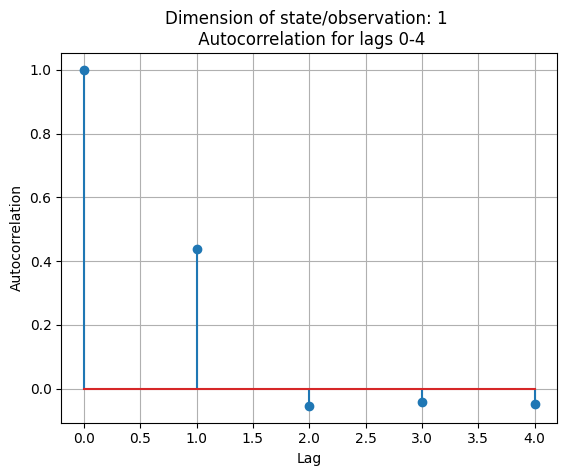

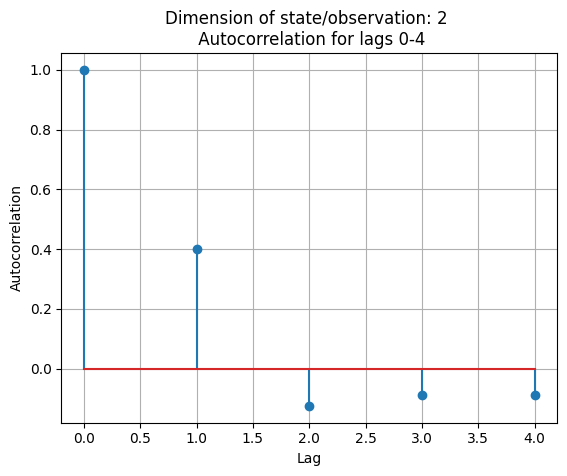

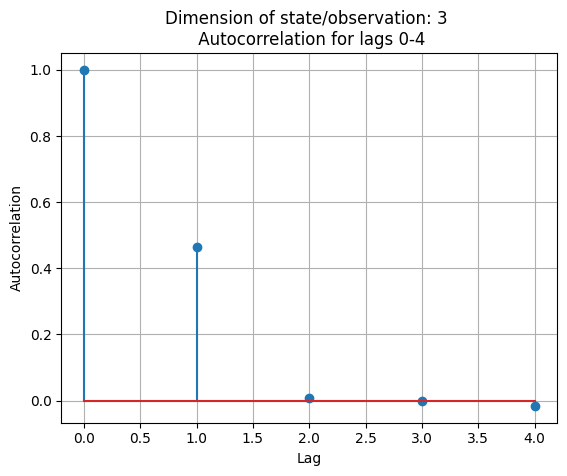

In [31]:
plot_autocorrelations(list_autocorr = autocorr,
                      max_lag = 5)

### Excess autocorrelations

In [41]:
excess_autocorr = get_excess_autocorrelations(env_name = "IMANOCartpoleEnv", 
                                              mod_corr_noise = [1.0], 
                                              mod_noise_std = 1.0, 
                                              max_lag = 5, 
                                              num_episodes = 1000)


ENVIRONMENT:  <IMANOCartpoleEnv instance>
 
PARAMETERS:
mod_corr_noise: [1.0]
mod_noise_std: 1.0
 
Number of dimensions in the state / observation:  4
Number of autocorrelation lags:  5
 
AUTOCORRELATIONS in each dimension:
Dim. of observation:  0
Autocorrelations:  [ 1.          0.39387494 -0.13819546 -0.10625587 -0.09089159]
 
Dim. of observation:  1
Autocorrelations:  [ 1.          0.43333676 -0.04992432 -0.03969065 -0.06413553]
 
Dim. of observation:  2
Autocorrelations:  [ 1.          0.39592619 -0.12644554 -0.09543535 -0.09158717]
 
Dim. of observation:  3
Autocorrelations:  [ 1.          0.46431959  0.00618595 -0.00340565 -0.03761893]
 
ENVIRONMENT:  <IMANOCartpoleEnv instance>
 
PARAMETERS:
mod_corr_noise: [0.0]
mod_noise_std: 1.0
 
Number of dimensions in the state / observation:  4
Number of autocorrelation lags:  5
 
AUTOCORRELATIONS in each dimension:
Dim. of observation:  0
Autocorrelations:  [ 1.         -0.06462608 -0.06256078 -0.04962144 -0.04000097]
 
Dim. of observati

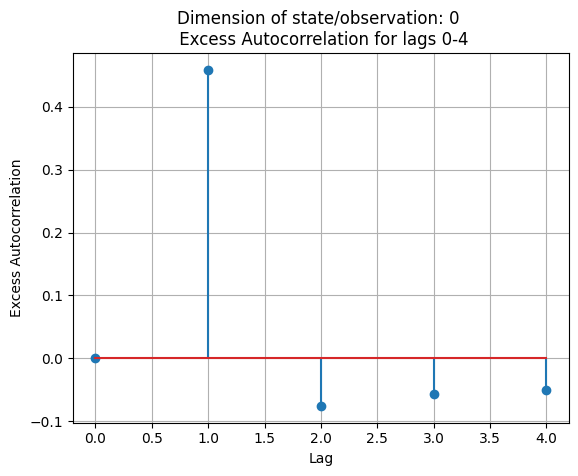

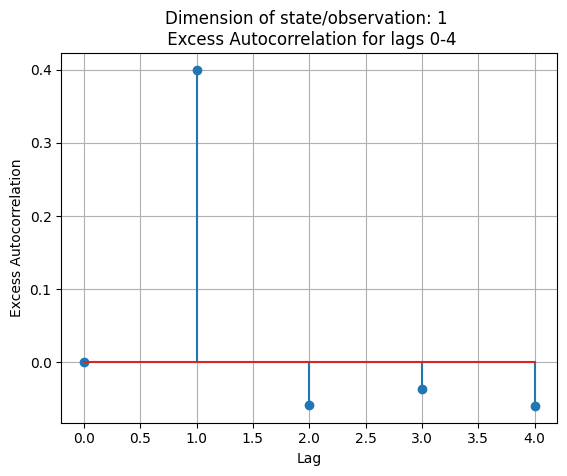

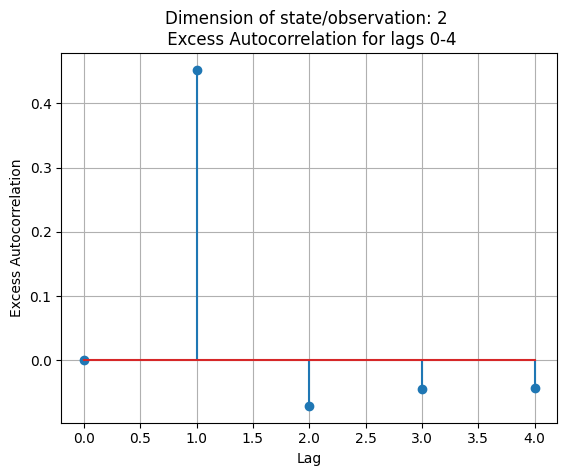

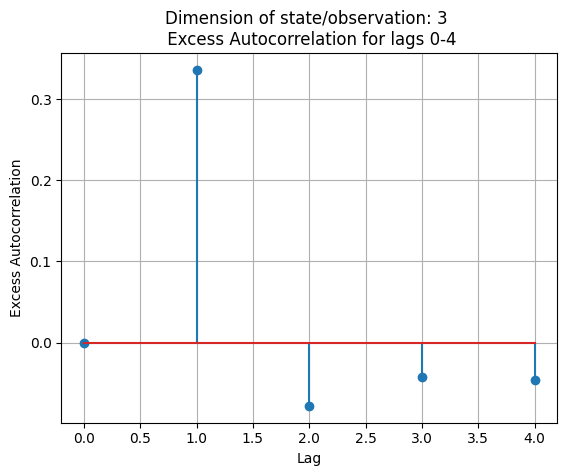

In [43]:
plot_excess_autocorrelations(excess_autocorr[0], excess_autocorr[1], max_lag = 5)